<a href="https://colab.research.google.com/github/Henrique-soliveira/github-slideshow/blob/Henrique-soliveira-patch-1/Aula_3_2%C2%B0_semestre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install unidecode


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [9]:
from wordcloud import WordCloud
from PIL import Image


In [7]:
import re
from unicodedata import normalize
import unidecode
import string

In [4]:
from spacy.lang.pt.stop_words import STOP_WORDS

In [10]:
STOP_WORDS

{'a',
 'acerca',
 'ademais',
 'adeus',
 'agora',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'antes',
 'ao',
 'aos',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujo',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquele',
 'dar',
 'das',
 'de',
 'debaixo',
 'demais',
 'dentro',
 'depois',
 'des',
 'desde',
 'dessa',
 'desse',
 'desta',
 'deste',
 'deve',
 'devem',
 'deverá',
 'dez',
 'dezanove',
 'dezasseis',
 'dezassete',
 'dezoito',
 'diante',
 'direita',
 'disso',
 'diz',
 'dizem',
 'dizer',
 'do',
 'dois',
 'dos',
 'doze',
 'duas',
 'dá

In [13]:
dados_texto = pd.read_csv('dados_cptm.csv' , encoding= 'latin1')

In [ ]:
dados_texto

## Pré-Processamento

In [16]:
# retirar url's
url_re = re.compile('https?://(www.)?\w+\.\w+(/\w+)*/?')

In [17]:
# pontuação
punc_re = re.compile('[%s]' % re.escape(string.punctuation))

In [18]:
# numeros
num_re = re.compile('(\\d+)')

In [19]:
# alfa numericos
alpha_num_re = re.compile("^[a-z0-9_.]+$")

In [20]:
# mencoes
mention_re = re.compile('@(\w+)')

## Ajustes



*   Deixar Minusculo



In [22]:
texto_ajustado = dados_texto['texto_do_twitter']. apply(lambda x: x.lower())
texto_ajustado

0       @cptm_oficial 20 min q estou esperando um trem...
1       [18h20] cptm: linha 11 - coral: velocidade red...
2       [18h20] cptm: linha 9 - esmeralda: operação no...
3       [18h20] cptm: linha 7 - rubi: velocidade reduz...
4       @_lcoliveira2016 @usuariosmetrosp @cptm_oficia...
                              ...                        
8465    [10h59] cptm: linha 9 - esmeralda: operação no...
8466    [10h59] cptm: linha 7 - rubi: velocidade reduz...
8467    [10h39] cptm: linha 11 - coral: operação norma...
8468    ao embarcar ou desembarcar na cptm tenha muito...
8469    [09h39] cptm: linha 9 - esmeralda: operação no...
Name: texto_do_twitter, Length: 8470, dtype: object

In [23]:
texto_ajustado = texto_ajustado.apply(lambda x: url_re.sub('', x))

In [24]:
texto_ajustado

0       @cptm_oficial 20 min q estou esperando um trem...
1       [18h20] cptm: linha 11 - coral: velocidade red...
2       [18h20] cptm: linha 9 - esmeralda: operação no...
3       [18h20] cptm: linha 7 - rubi: velocidade reduz...
4       @_lcoliveira2016 @usuariosmetrosp @cptm_oficia...
                              ...                        
8465    [10h59] cptm: linha 9 - esmeralda: operação no...
8466    [10h59] cptm: linha 7 - rubi: velocidade reduz...
8467    [10h39] cptm: linha 11 - coral: operação norma...
8468    ao embarcar ou desembarcar na cptm tenha muito...
8469    [09h39] cptm: linha 9 - esmeralda: operação no...
Name: texto_do_twitter, Length: 8470, dtype: object

- Tratamento das menções

In [26]:
texto_ajustado = texto_ajustado.apply(lambda x: mention_re.sub('', x))
texto_ajustado

0        20 min q estou esperando um trem pra luz na b...
1       [18h20] cptm: linha 11 - coral: velocidade red...
2       [18h20] cptm: linha 9 - esmeralda: operação no...
3       [18h20] cptm: linha 7 - rubi: velocidade reduz...
4          durante a semana eles ñ reprimem o comércio...
                              ...                        
8465    [10h59] cptm: linha 9 - esmeralda: operação no...
8466    [10h59] cptm: linha 7 - rubi: velocidade reduz...
8467    [10h39] cptm: linha 11 - coral: operação norma...
8468    ao embarcar ou desembarcar na cptm tenha muito...
8469    [09h39] cptm: linha 9 - esmeralda: operação no...
Name: texto_do_twitter, Length: 8470, dtype: object

- Pontuações

In [28]:
texto_ajustado = texto_ajustado.apply(lambda x: punc_re.sub('', x))
texto_ajustado

0        20 min q estou esperando um trem pra luz na b...
1       18h20 cptm linha 11  coral velocidade reduzida...
2       18h20 cptm linha 9  esmeralda operação normal ...
3       18h20 cptm linha 7  rubi velocidade reduzida  ...
4          durante a semana eles ñ reprimem o comércio...
                              ...                        
8465    10h59 cptm linha 9  esmeralda operação normal ...
8466    10h59 cptm linha 7  rubi velocidade reduzida  ...
8467    10h39 cptm linha 11  coral operação normal  li...
8468    ao embarcar ou desembarcar na cptm tenha muito...
8469    09h39 cptm linha 9  esmeralda operação normal ...
Name: texto_do_twitter, Length: 8470, dtype: object

- Limpar numeração

In [ ]:
texto_ajustado = texto_ajustado.apply(lambda x: num_re.sub(' ', x))
texto_ajustado

- Limpar acentuação

In [ ]:
texto_ajustado = texto_ajustado.apply(lambda x: normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII'))
texto_ajustado

- Limpar textos alfa numericos e palavras menores que 3 caracteres

In [32]:
def preprocessamento_texto(texto, n):
  '''Ajustar caracteres alfa numéricos e palavras menores que n
     texto: texto a ser ajustado
     n: tamanho mínimo das palavras'''
  list_pos = 0
  cleaned_str = ''
  for word in texto.split():
      if list_pos == 0:
          if alpha_num_re.match(word) and len(word) > n:
              cleaned_str = word
          else:
              cleaned_str = ' '
      else:
          if alpha_num_re.match(word) and len(word) > n:
              cleaned_str = cleaned_str + ' ' + word
          else:
              cleaned_str += ' '
      list_pos += 1
  return cleaned_str

In [33]:
texto_ajustado = texto_ajustado.apply(lambda x: preprocessamento_texto(x, 3))
texto_ajustado

0                estou esperando  trem      nada  absurdo
1         cptm linha coral velocidade reduzida linha s...
2         cptm linha esmeralda operacao normal linha t...
3         cptm linha rubi velocidade reduzida linha di...
4       durante  semana eles  reprimem  comercio irreg...
                              ...                        
8465      cptm linha esmeralda operacao normal linha t...
8466      cptm linha rubi velocidade reduzida linha di...
8467      cptm linha coral operacao normal linha safir...
8468      embarcar  desembarcar  cptm tenha muito cuid...
8469      cptm linha esmeralda operacao normal linha t...
Name: texto_do_twitter, Length: 8470, dtype: object

- Ajustar palavras muito usadas (*stopwords*)

> Bloco com recuo

In [34]:
def remove_stops(texto):
    # expects a string
    stops = set(STOP_WORDS)
    list_pos = 0
    cleaned_str = ''
    text = texto.split()
    for word in text:
        if word not in stops:
            # rebuild cleaned_str
            if list_pos == 0:
                cleaned_str = word
            else:
                cleaned_str = cleaned_str + ' ' + word
            list_pos += 1
    return cleaned_str

In [35]:
list(STOP_WORDS)[0:15]

['favor',
 'fora',
 'aquele',
 'vossa',
 'assim',
 'contudo',
 'menos',
 'apoia',
 'isto',
 'tal',
 'valor',
 'oitava',
 'vais',
 'tuas',
 'vinte']

In [36]:
texto_ajustado = texto_ajustado.apply(lambda x: remove_stops(x))
texto_ajustado

0                                  esperando trem absurdo
1       cptm linha coral velocidade reduzida linha saf...
2       cptm linha esmeralda operacao normal linha tur...
3       cptm linha rubi velocidade reduzida linha diam...
4       durante semana reprimem comercio irregular que...
                              ...                        
8465    cptm linha esmeralda operacao normal linha tur...
8466    cptm linha rubi velocidade reduzida linha diam...
8467    cptm linha coral operacao normal linha safira ...
8468    embarcar desembarcar cptm tenha cuidado altura...
8469    cptm linha esmeralda operacao normal linha tur...
Name: texto_do_twitter, Length: 8470, dtype: object

- Gravar as mudanças no dataframe

In [ ]:
dados_texto['texto_tratado'] = texto_ajustado
dados_texto

## Nuvem de palavras

In [41]:
texto_completo = " ".join(s for s in dados_texto['texto_tratado'])

In [42]:
wc = WordCloud()
#wc = WordCloud(max_font_size=40, background_color='white')
wc.generate(texto_completo)

(-0.5, 399.5, 199.5, -0.5)

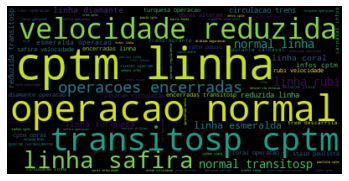

In [43]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plot_path = 'cptm_wordcloud.png'
#plt.savefig(plot_path,  bbox_inches='tight', dpi = 100)

- Nuvem com formato

In [46]:
trem_formato = np.array(Image.open('trem.png'))

(-0.5, 715.5, 361.5, -0.5)

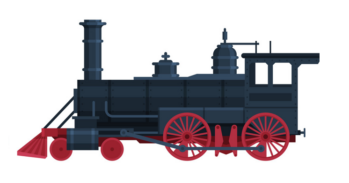

In [47]:
plt.figure()
plt.imshow(trem_formato, interpolation='bilinear')
plt.axis("off")

In [48]:
wc = WordCloud(background_color='white', mask=trem_formato)

In [49]:
wc.generate(texto_completo)

In [50]:
wc.to_file("trem.png")

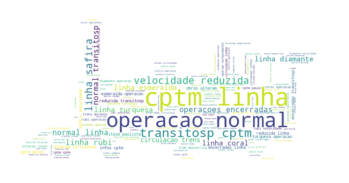

In [51]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plot_path = 'trem_cptm_wordcloud.png'
plt.savefig(plot_path,  bbox_inches='tight', dpi = 300)